In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [2]:
file_path = "Uber-Jan-Feb-FOIL.csv"
df = pd.read_csv(file_path)
df.head()

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   dispatching_base_number  354 non-null    object
 1   date                     354 non-null    object
 2   active_vehicles          354 non-null    int64 
 3   trips                    354 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 11.2+ KB


In [4]:
df = df.drop(['dispatching_base_number','date'],axis=1)
df = df.dropna()

In [8]:
X = StandardScaler().fit_transform(df)

In [9]:
dbs = DBSCAN(eps=1.0,min_samples=3,metric='euclidean')

In [10]:
df['cluster'] = dbs.fit_predict(X)

In [11]:
df['cluster'].value_counts()

cluster
0    296
1     58
Name: count, dtype: int64

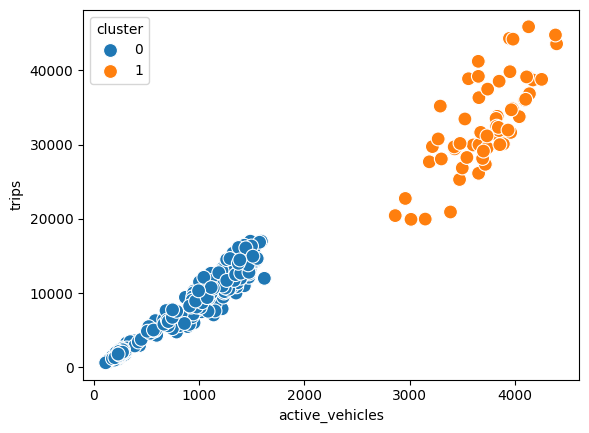

In [12]:
sns.scatterplot(data=df,x='active_vehicles',y='trips',hue='cluster',s=100)
plt.show()